In [93]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\daria\AppData\Local\Temp\ipykernel_5944\82325636.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [94]:
# Загрузка пакетов
# загрузка пакетов: инструменты --------------------------------------------
# работа с массивами
import numpy as np
# фреймы данных
import pandas as pd
# графики
import matplotlib as mpl
# стили и шаблоны графиков на основе matplotlib
import seaborn as sns
# перекодировка категориальных переменных
from sklearn.preprocessing import LabelEncoder
# тест Шапиро-Уилка на нормальность распределения
from scipy.stats import shapiro
# для таймера
import time
# загрузка пакетов: модели -------------------------------------------------
# линейные модели
import sklearn.linear_model as skl
# расчёт MSE
from sklearn.metrics import mean_squared_error
# кросс-валидация
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.model_selection import KFold, cross_val_score


# константы
# ядро для генератора случайных чисел
my_seed = 17
# создаём псевдоним для короткого обращения к графикам
plt = mpl.pyplot
# настройка стиля и отображения графиков
sns.set_palette("Set2")
# читаем таблицу из файла .csv во фрейм
fileURL = 'https://raw.githubusercontent.com/ania607/ML/refs/heads/main/data/College_for_lab.csv'
DF_raw = pd.read_csv(fileURL)

# выясняем размерность фрейма
print('Число строк и столбцов в наборе данных:\n', DF_raw.shape)

# первые 5 строк фрейма
DF_raw.head(5)


Число строк и столбцов в наборе данных:
 (777, 9)


,Grad_Rate,Accept,Top10perc,Top25perc,F_Undergrad,P_Undergrad,PhD,Expend,Private
0,60,1232,23,52,2885,537,70,7041,Yes
1,56,1924,16,29,2683,1227,29,10527,Yes
2,54,1097,22,50,1036,99,53,8735,Yes
3,59,349,60,89,510,63,92,19016,Yes
4,15,146,16,44,249,869,76,10922,Yes


In [95]:
# типы столбцов фрейма
DF_raw.dtypes

Grad_Rate       int64
Accept          int64
Top10perc       int64
Top25perc       int64
F_Undergrad     int64
P_Undergrad     int64
PhD             int64
Expend          int64
Private        object
dtype: object

In [96]:
# считаем пропуски в каждом столбце
DF_raw.isna().sum()

# оставляем только переменные варианта 17
DF = DF_raw[['Grad_Rate', 'Accept', 'Top10perc', 'Private']].copy()

# удаляем фрейм-исходник
del DF_raw
# кодируем категориальные переменные
# Private
private_dict = {'Yes': 1, 'No': 0}
DF['Private'] = DF.Private.map(private_dict)

# сколько теперь столбцов
DF.shape
# смотрим первые 8 строк
DF.head(8)

,Grad_Rate,Accept,Top10perc,Private
0,60,1232,23,1
1,56,1924,16,1
2,54,1097,22,1
3,59,349,60,1
4,15,146,16,1
5,55,479,38,1
6,63,340,17,1
7,73,1720,37,1


In [97]:
# данные для построения моделей
DF_train = DF.sample(frac=0.8, random_state=my_seed)
# данные для прогнозов
DF_test = DF.drop(DF_train.index)

print(f"Обучающая выборка: {DF_train.shape[0]} наблюдений")
print(f"Тестовая выборка: {DF_test.shape[0]} наблюдений")

Обучающая выборка: 622 наблюдений
Тестовая выборка: 155 наблюдений


Предварительный анализ данных:

In [98]:
# описательные статистики для непрерывных переменных
DF_train[['Grad_Rate', 'Accept', 'Top10perc']].describe()

,Grad_Rate,Accept,Top10perc
count,622.000000,622.000000,622.000000
mean,65.771704,2107.274920,27.824759
std,17.450809,2602.168187,18.406481
min,10.000000,90.000000,1.000000
25%,53.000000,589.750000,15.000000
50%,66.000000,1193.500000,23.000000
75%,78.000000,2569.500000,36.000000
max,118.000000,26330.000000,96.000000


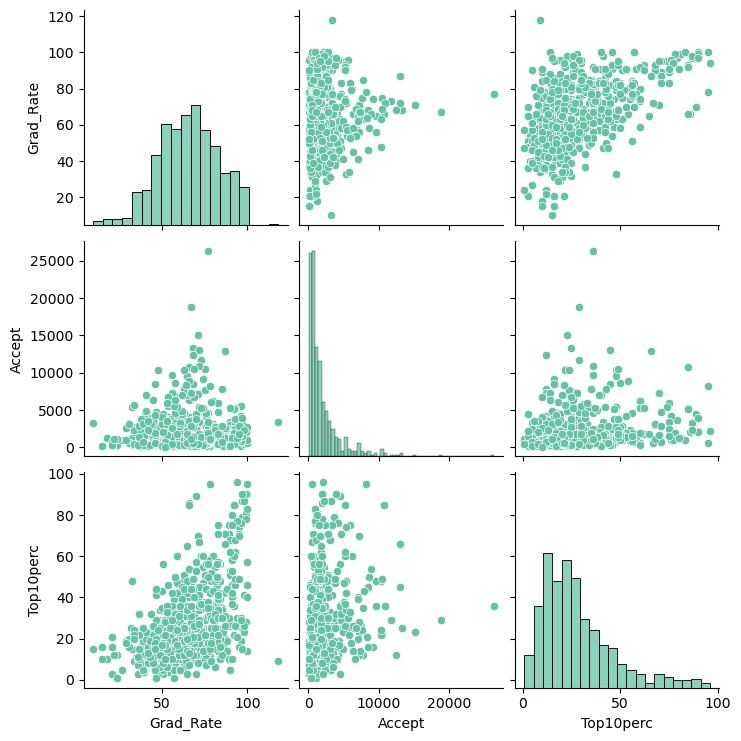

In [99]:
# матричный график разброса с линиями регрессии
sns.pairplot(DF_train[['Grad_Rate', 'Accept', 'Top10perc']])
plt.show()

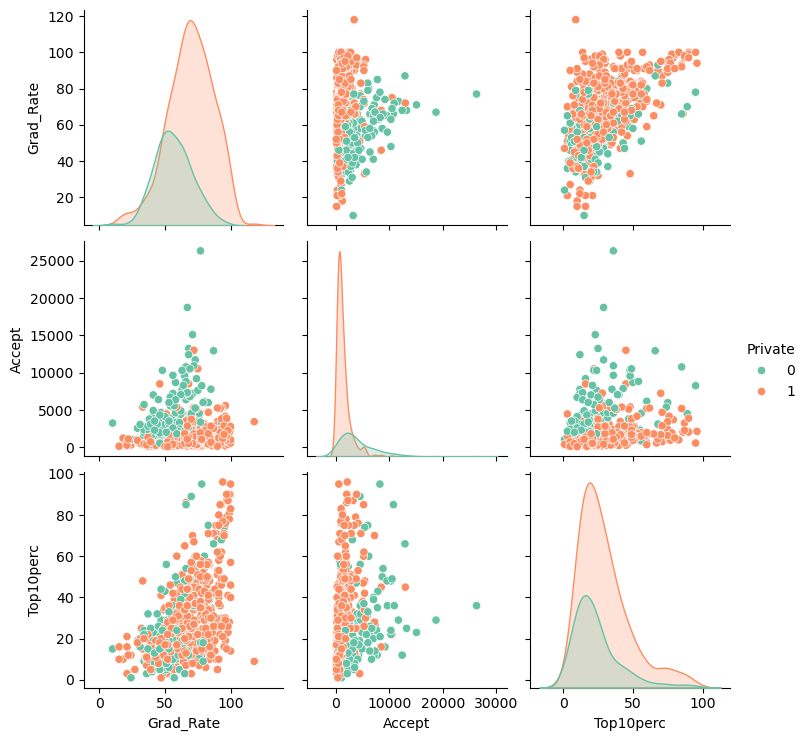

In [100]:
# матричный график разброса с цветом по Private
sns.pairplot(DF_train[['Grad_Rate', 'Accept', 'Top10perc', 'Private']], hue='Private')
plt.show()

In [101]:
# корреляционная матрица по всем наблюдениям
corr_mat = DF_train[['Grad_Rate', 'Accept', 'Top10perc']].corr()
print("Корреляционная матрица:")
print(np.around(corr_mat, 2))

Корреляционная матрица:
           Grad_Rate  Accept  Top10perc
Grad_Rate       1.00    0.07       0.52
Accept          0.07    1.00       0.20
Top10perc       0.52    0.20       1.00


In [102]:
# логарифмируем зависимую переменную
DF_train['log_Grad_Rate'] = np.log(DF_train['Grad_Rate'])
# описательные статистики для непрерывных показателей
DF_train[['Grad_Rate', 'log_Grad_Rate', 'Accept', 'Top10perc']].describe()

,Grad_Rate,log_Grad_Rate,Accept,Top10perc
count,622.000000,622.000000,622.000000,622.000000
mean,65.771704,4.144546,2107.274920,27.824759
std,17.450809,0.307109,2602.168187,18.406481
min,10.000000,2.302585,90.000000,1.000000
25%,53.000000,3.970292,589.750000,15.000000
50%,66.000000,4.189655,1193.500000,23.000000
75%,78.000000,4.356709,2569.500000,36.000000
max,118.000000,4.770685,26330.000000,96.000000


In [103]:
# тестируем на нормальность
for col in ['Grad_Rate', 'log_Grad_Rate']:
    stat, p = shapiro(DF_train[col])
    print(col, 'Statistics=%.3f, p=%.4f' % (stat, p))
    # интерпретация
    alpha = 0.05
    if p > alpha:
        print('Распределение нормально (H0 не отклоняется)\n')
    else:
        print('Распределение не нормально (H0 отклоняется)\n')

Grad_Rate Statistics=0.994, p=0.0117
Распределение не нормально (H0 отклоняется)

log_Grad_Rate Statistics=0.920, p=0.0000
Распределение не нормально (H0 отклоняется)



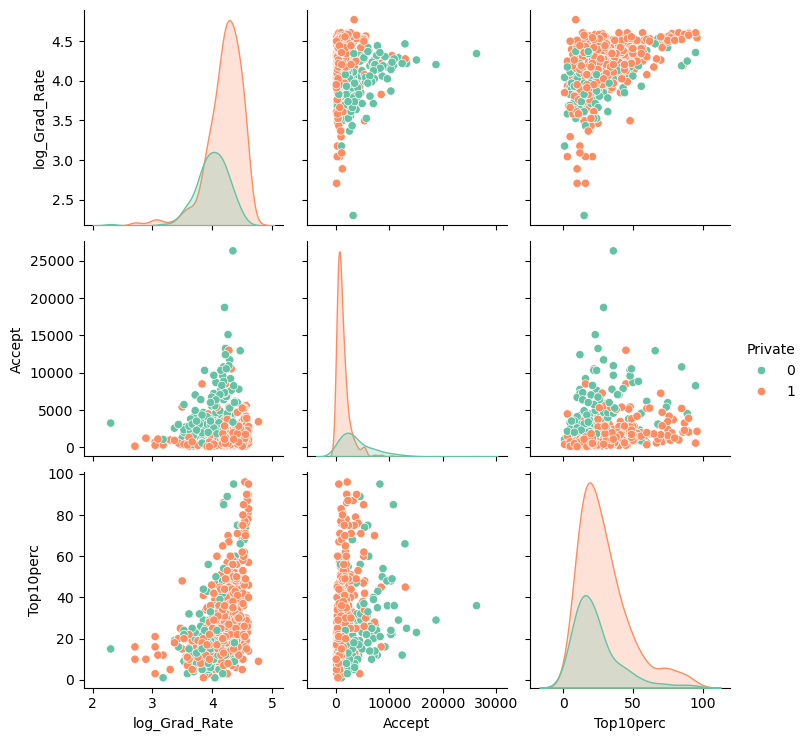

In [104]:
# матричный график разброса с цветом по Private
sns.pairplot(DF_train[['log_Grad_Rate', 'Accept', 'Top10perc', 'Private']], hue='Private')
plt.show()

Строим модели регрессии:

In [105]:
# данные для моделей 1, 5
df1 = DF_train[['Grad_Rate', 'Accept', 'Top10perc', 'Private']]
# данные для моделей 2, 6
df2 = DF_train[['Grad_Rate', 'Accept', 'Top10perc', 'Private']]
df2.loc[:, 'Accept_Private'] = df2.loc[:, 'Accept'] * df2.loc[:, 'Private']
df2 = df2.drop(['Accept'], axis=1)
# данные для моделей 3, 7
df3 = DF_train[['Grad_Rate', 'Accept', 'Top10perc', 'Private']]
df3.loc[:, 'Top10perc_Private'] = df3.loc[:, 'Top10perc'] * df3.loc[:, 'Private']
df3 = df3.drop(['Top10perc'], axis=1)
# данные для моделей 4, 8
df4 = DF_train[['Grad_Rate', 'Accept', 'Top10perc', 'Private']]
df4.loc[:, 'Accept_Private'] = df4.loc[:, 'Accept'] * df4.loc[:, 'Private']
df4.loc[:, 'Top10perc_Private'] = df4.loc[:, 'Top10perc'] * df4.loc[:, 'Private']
df4 = df4.drop(['Accept', 'Top10perc'], axis=1)

# данные для моделей 0, 9 (со всеми объясняющими)
df0 = DF_train[['Grad_Rate', 'Accept', 'Top10perc', 'Private']]

In [106]:
# данные для логарифмированных моделей
df1_log = df1.copy()
df1_log['Grad_Rate'] = DF_train['log_Grad_Rate']
df2_log = df2.copy() 
df2_log['Grad_Rate'] = DF_train['log_Grad_Rate']
df3_log = df3.copy()
df3_log['Grad_Rate'] = DF_train['log_Grad_Rate']
df4_log = df4.copy()
df4_log['Grad_Rate'] = DF_train['log_Grad_Rate']
df0_log = df0.copy()
df0_log['Grad_Rate'] = DF_train['log_Grad_Rate']

lm = skl.LinearRegression()

# модель со всеми объясняющими, y
X = df0.drop(['Grad_Rate'], axis=1)
y = df0.Grad_Rate.values.reshape(-1, 1)
fit_lm_0 = lm.fit(X, y)
print('модель fit_lm_0:\n',
      'константа ', np.around(fit_lm_0.intercept_, 3),
      '\n объясняющие ', list(X.columns.values),
      '\n коэффициенты ', np.around(fit_lm_0.coef_, 3))

модель fit_lm_0:
 константа  [42.683] 
 объясняющие  ['Accept', 'Top10perc', 'Private'] 
 коэффициенты  [[1.0000e-03 4.2000e-01 1.3108e+01]]


In [107]:
# модель со всеми объясняющими, y_log
X = df0.drop(['Grad_Rate'], axis=1)
y = df0_log.Grad_Rate.values.reshape(-1, 1)
fit_lm_0_log = lm.fit(X, y)
print('модель fit_lm_0_log:\n',
      'константа ', np.around(fit_lm_0_log.intercept_, 3),
      '\n объясняющие ', list(X.columns.values),
      '\n коэффициенты ', np.around(fit_lm_0_log.coef_, 3))

# пересчёт константы для интерпретации
np.round(np.exp(fit_lm_0_log.intercept_), 1)

# пересчёт коэффициентов для их интерпретации
np.round((np.exp(fit_lm_0_log.coef_) - 1) * 100, 1)

# оценим MSE на обучающей
# прогнозы
y_pred = fit_lm_0_log.predict(X)
MSE_log = sum((np.exp(y) - np.exp(y_pred).reshape(-1, 1))**2) / len(y)
MSE_log

print('MSE_train модели для Grad_Rate меньше MSE_train',
      'модели для log(Grad_Rate) в ',
      np.around(MSE_log / MSE, 1), 'раз')

модель fit_lm_0_log:
 константа  [3.769] 
 объясняющие  ['Accept', 'Top10perc', 'Private'] 
 коэффициенты  [[0.    0.007 0.214]]
MSE_train модели для Grad_Rate меньше MSE_train модели для log(Grad_Rate) в  [1.] раз


In [108]:
#Оценка точности:

# Перекрёстная проверка по 10 блокам
folds = 10

# ядра для разбиений перекрёстной проверкой
r_state = np.arange(my_seed, my_seed + 9)

# модели для y
scores = list()
# таймер
tic = time.perf_counter()
i = 0
for df in [df0, df1, df2, df3, df4]:
    X = df.drop(['Grad_Rate'], axis=1)
    y = df.Grad_Rate
    kf_10 = KFold(n_splits=folds, random_state=r_state[i], shuffle=True)
    score = cross_val_score(lm, X, y, cv=kf_10, 
                          scoring='neg_mean_squared_error').mean()
    scores.append(score)
    i += 1

# таймер
toc = time.perf_counter()
print(f"Расчёты методом CV по 10 блокам заняли {toc - tic:0.2f} секунд")

# Перекрёстная проверка по 10 блокам
folds = 10

# ядра для разбиений перекрёстной проверкой
r_state = np.arange(my_seed, my_seed + 9)



Расчёты методом CV по 10 блокам заняли 0.26 секунд


Прогноз на отложенные наблюдения по лучшей модели:

In [109]:
# Определяем лучшие модели
best_grad_rate = fits[scores.index(max(scores))]
best_log_grad_rate = fits[scores_log.index(max(scores_log))]

print(f"Лучшая модель для Grad_Rate: {best_grad_rate}")
print(f"Лучшая модель для log(Grad_Rate): {best_log_grad_rate}")

# Прогноз по лучшей модели для Grad_Rate
# модель на всех обучающих наблюдениях
if best_grad_rate == 'fit_lm_0':
    X_train = df0.drop(['Grad_Rate'], axis=1)
elif best_grad_rate == 'fit_lm_1':
    X_train = df1.drop(['Grad_Rate'], axis=1)
elif best_grad_rate == 'fit_lm_2':
    X_train = df2.drop(['Grad_Rate'], axis=1)
elif best_grad_rate == 'fit_lm_3':
    X_train = df3.drop(['Grad_Rate'], axis=1)
else:  # fit_lm_4
    X_train = df4.drop(['Grad_Rate'], axis=1)

y_train = DF_train['Grad_Rate'].values.reshape(-1, 1)
fit_best_grad = lm.fit(X_train, y_train)

# Подготовка тестовых данных
if best_grad_rate == 'fit_lm_0':
    X_test = DF_test[['Accept', 'Top10perc', 'Private']]
elif best_grad_rate == 'fit_lm_1':
    X_test = DF_test[['Accept', 'Top10perc', 'Private']]
elif best_grad_rate == 'fit_lm_2':
    X_test = DF_test[['Top10perc', 'Private']].copy()
    X_test['Accept_Private'] = X_test['Private'] * DF_test['Accept']
elif best_grad_rate == 'fit_lm_3':
    X_test = DF_test[['Accept', 'Private']].copy()
    X_test['Top10perc_Private'] = X_test['Private'] * DF_test['Top10perc']
else:  # fit_lm_4
    X_test = DF_test[['Private']].copy()
    X_test['Accept_Private'] = X_test['Private'] * DF_test['Accept']
    X_test['Top10perc_Private'] = X_test['Private'] * DF_test['Top10perc']

# значения y на отложенных наблюдениях
y_test = DF_test[['Grad_Rate']].values.reshape(-1, 1)

# прогнозы
y_pred = fit_best_grad.predict(X_test)

# ошибка
MSE_test_grad = sum((y_test - y_pred.reshape(-1, 1))**2) / len(y_test)
print('MSE модели', best_grad_rate, 'на отложенных наблюдениях = %.2f' % MSE_test_grad)

# Прогноз по лучшей модели для log(Grad_Rate)
# модель на всех обучающих наблюдениях
if best_log_grad_rate == 'fit_lm_0_log':
    X_train_log = df0_log.drop(['Grad_Rate'], axis=1)
elif best_log_grad_rate == 'fit_lm_1_log':
    X_train_log = df1_log.drop(['Grad_Rate'], axis=1)
elif best_log_grad_rate == 'fit_lm_2_log':
    X_train_log = df2_log.drop(['Grad_Rate'], axis=1)
elif best_log_grad_rate == 'fit_lm_3_log':
    X_train_log = df3_log.drop(['Grad_Rate'], axis=1)
else:  # fit_lm_4_log
    X_train_log = df4_log.drop(['Grad_Rate'], axis=1)

y_train_log = DF_train['log_Grad_Rate'].values.reshape(-1, 1)
fit_best_log = lm.fit(X_train_log, y_train_log)

# Подготовка тестовых данных (такая же структура как для обычной версии)
if best_log_grad_rate == 'fit_lm_0_log':
    X_test_log = DF_test[['Accept', 'Top10perc', 'Private']]
elif best_log_grad_rate == 'fit_lm_1_log':
    X_test_log = DF_test[['Accept', 'Top10perc', 'Private']]
elif best_log_grad_rate == 'fit_lm_2_log':
    X_test_log = DF_test[['Top10perc', 'Private']].copy()
    X_test_log['Accept_Private'] = X_test_log['Private'] * DF_test['Accept']
elif best_log_grad_rate == 'fit_lm_3_log':
    X_test_log = DF_test[['Accept', 'Private']].copy()
    X_test_log['Top10perc_Private'] = X_test_log['Private'] * DF_test['Top10perc']
else:  # fit_lm_4_log
    X_test_log = DF_test[['Private']].copy()
    X_test_log['Accept_Private'] = X_test_log['Private'] * DF_test['Accept']
    X_test_log['Top10perc_Private'] = X_test_log['Private'] * DF_test['Top10perc']

# значения y на отложенных наблюдениях
y_test_log = np.log(DF_test[['Grad_Rate']].values.reshape(-1, 1))

# прогнозы
y_pred_log = fit_best_log.predict(X_test_log)

# ошибка (преобразуем обратно из логарифма)
MSE_test_log = sum((np.exp(y_test_log) - np.exp(y_pred_log).reshape(-1, 1))**2) / len(y_test_log)
print('MSE модели', best_log_grad_rate, 'на отложенных наблюдениях = %.2f' % MSE_test_log)

# Выбираем окончательную лучшую модель
if MSE_test_grad < MSE_test_log:
    final_best_model = best_grad_rate
    final_MSE = MSE_test_grad
    final_fit = fit_best_grad
    final_X_train = X_train
    is_log = False
else:
    final_best_model = best_log_grad_rate
    final_MSE = MSE_test_log
    final_fit = fit_best_log
    final_X_train = X_train_log
    is_log = True

print('ФИНАЛЬНАЯ ЛУЧШАЯ МОДЕЛЬ:', final_best_model)
print('MSE на отложенных наблюдениях: %.2f' % final_MSE)

# Интерпретация параметров финальной модели
print('модель', final_best_model, ':\n',
      'константа ', np.around(final_fit.intercept_, 3),
      '\n объясняющие ', list(final_X_train.columns.values),
      '\n коэффициенты ', np.around(final_fit.coef_, 3))

if is_log:
    print("\nИНТЕРПРЕТАЦИЯ ДЛЯ ЛОГАРИФМИРОВАННОЙ МОДЕЛИ:")
    print(f"Базовый уровень: {np.exp(final_fit.intercept_[0]):.2f}")
    for i, col in enumerate(final_X_train.columns):
        pct_change = (np.exp(final_fit.coef_[0][i]) - 1) * 100
        print(f"{col}: при увеличении на 1 единицу, Grad_Rate изменяется на {pct_change:.2f}%")
else:
    print("\nИНТЕРПРЕТАЦИЯ ДЛЯ ОБЫЧНОЙ МОДЕЛИ:")
    print(f"Базовый уровень выпускного балла: {final_fit.intercept_[0]:.2f}")
    for i, col in enumerate(final_X_train.columns):
        print(f"{col}: при увеличении на 1 единицу, Grad_Rate изменяется на {final_fit.coef_[0][i]:.2f} пунктов")

Лучшая модель для Grad_Rate: fit_lm_0_log
Лучшая модель для log(Grad_Rate): fit_lm_0_log
MSE модели fit_lm_0_log на отложенных наблюдениях = 209.82
MSE модели fit_lm_0_log на отложенных наблюдениях = 205.47
ФИНАЛЬНАЯ ЛУЧШАЯ МОДЕЛЬ: fit_lm_0_log
MSE на отложенных наблюдениях: 205.47
модель fit_lm_0_log :
 константа  [3.769] 
 объясняющие  ['Accept', 'Top10perc', 'Private'] 
 коэффициенты  [[0.    0.007 0.214]]

ИНТЕРПРЕТАЦИЯ ДЛЯ ЛОГАРИФМИРОВАННОЙ МОДЕЛИ:
Базовый уровень: 43.35
Accept: при увеличении на 1 единицу, Grad_Rate изменяется на 0.00%
Top10perc: при увеличении на 1 единицу, Grad_Rate изменяется на 0.66%
Private: при увеличении на 1 единицу, Grad_Rate изменяется на 23.89%


C:\Users\daria\AppData\Local\Temp\ipykernel_5944\1991124136.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('MSE модели', best_grad_rate, 'на отложенных наблюдениях = %.2f' % MSE_test_grad)
C:\Users\daria\AppData\Local\Temp\ipykernel_5944\1991124136.py:90: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('MSE модели', best_log_grad_rate, 'на отложенных наблюдениях = %.2f' % MSE_test_log)
C:\Users\daria\AppData\Local\Temp\ipykernel_5944\1991124136.py:107: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before perf